# ASEN6008 HW7

## Imports

In [6]:
from Propagators import CR3BP, ode_solve
import numpy as np
import matplotlib.pyplot as plt
import IMD

## 1

In [7]:
au = 1.49597870691e11
GM_sun = 1.32712440018e20
GM_em = 4.035032351966808e14

%dimensional values
X = 150000000.0*1e3
Y = 6000.0*1e3
Z = 1450.0*1e3
U = 0.00075*1e3
V = 0.08*1e3
W = 0.019*1e3
T = 450.0*86400

%nondimensionalize everything
x = X/au
y = Y/au
z = Z/au
pos = np.vstack((x,y,z))
print(pos)
P = 2*np.pi*np.sqrt(au**3/(GM_sun+GM_em))
n = 2*np.pi/P
t = n*T
print(t)
u = U/au/n
v = V/au/n
w = W/au/n
vel = np.vstack((u,v,w))
print(vel)

UsageError: Line magic function `%dimensional` not found.


## 2

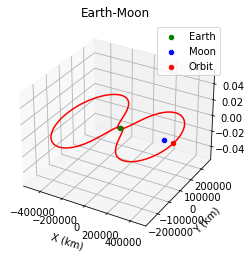

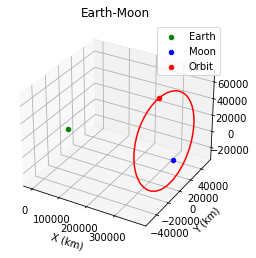

In [8]:
mu = 0.012150585609624
L = 384747.962856037
moon = np.hstack([1-mu,0,0])
Earth = np.hstack([-mu,0,0])

#first orbit
x1 = 1.2
y1 = 0.
z1 = 0.
u1 = 0.
v1 = -1.06110124
w1 = 0.
t1 = 6.20628
is_vec = np.vstack([x1,y1,z1,u1,v1,w1])
orb1 =  ode_solve(fun=CR3BP, tspan=np.linspace(0,t1,2000), init_state=is_vec, args=mu)
orb1 = orb1.y
orb1 = orb1*L
Earth = Earth*L
moon = moon*L
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(Earth[0],Earth[1],Earth[2], color='g', marker='o', label='Earth')
ax.scatter(moon[0],moon[1],moon[2], color='b', marker='o', label='Moon')
ax.scatter(orb1[0,-1],orb1[1,-1],orb1[2,-1], color='r',marker='o', label='Orbit')
ax.plot(orb1[0,:],orb1[1,:],orb1[2,:], color='r')
ax.grid
plt.title('Earth-Moon')
ax.legend()
plt.xlabel('X (km)')
plt.ylabel('Y (km)')

#second orbit
x2 = 0.85
y2 = 0.
z2 = 0.17546505
u2 = 0.
v2 = 0.2628980369
w2 = 0.
t2 = 2.5543991
orb2 = ode_solve(fun=CR3BP, tspan=np.linspace(0,t2), init_state=np.vstack([x2,y2,z2,u2,v2,w2]), args=mu)
orb2 = orb2.y
orb2 = orb2*L
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(Earth[0],Earth[1],Earth[2], color='g', marker='o', label='Earth')
ax.scatter(moon[0],moon[1],moon[2], color='b',marker='o', label='Moon')
ax.scatter(orb2[0,-1],orb2[1,-1],orb2[2,-1], color='r', marker='o', label='Orbit')
ax.plot(orb2[0,:],orb2[1,:],orb2[2,:], color='r')
ax.grid
plt.title('Earth-Moon')
ax.legend()
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.show()

## 3

C:\Users\swtke\AppData\Local\Programs\Python\Python310\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  dz /= az


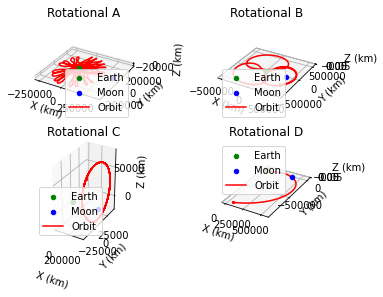

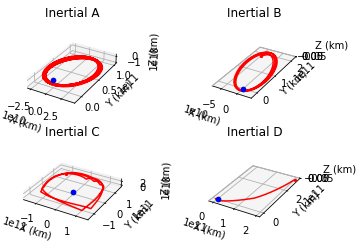

In [9]:
#givens
mu = 0.012150585609624
L = 384747.962856037
Earth = np.vstack([-mu,0,0])*L
moon = np.vstack([1-mu,0,0])
Moon = moon*L

#table 2 info
vals = np.array([[-0.083,-0.03,0.01,3.53,-3.1,-0.1],
        [0.05,-0.05,0,4.0,2.6,0],
        [0.875, 0, 0.1914, 0, 0.23234, 0],
        [-0.05, -0.02, 0.0, 4.09, -5.27, 0.0]])
ts = [26,15,15,2.5]
orb_tit = ['A','B','C','D']

#do the plotting and differentiating
for k in range(len(ts)):
    #rotational
    fig = plt.figure(3)
    tspan = np.linspace(0,ts[k],2000)
    orb_rot =  ode_solve(fun=CR3BP, tspan=tspan, init_state=vals[k,:], args=mu)
    Orb_Rot = orb_rot.y*L
    ax = fig.add_subplot(2,2,k+1, projection='3d', adjustable='box')
    ax.set_box_aspect((np.ptp(Orb_Rot[0,:]), np.ptp(Orb_Rot[1,:]), np.ptp(Orb_Rot[2,:])))
    ax.scatter(Earth[0],Earth[1],Earth[2], color='g', marker='o', label='Earth')
    ax.scatter(Moon[0],Moon[1],Moon[2], color='b',marker='o', label='Moon')
    ax.scatter(Orb_Rot[0,-1],Orb_Rot[1,-1],Orb_Rot[2,-1], color='r', marker='.')
    ax.plot(Orb_Rot[0,:],Orb_Rot[1,:],Orb_Rot[2,:], color='r', label='Orbit')
    ax.set_xlabel('X (km)')
    ax.set_ylabel('Y (km)')
    ax.set_zlabel('Z (km)', rotation=90)
    ax.legend()
    plt.title(f'Rotational {orb_tit[k]}')
    plt.grid

    #inertial
    ri = np.zeros(shape=(len(tspan),3))
    vi = np.zeros(shape=(len(tspan),3))
    Mr = np.zeros_like(ri)
    Mv = np.zeros_like(vi)
    inert_coords = IMD.rot2inert(orb_rot.y, non_tspan=tspan, L=L)
    ri = inert_coords[range(3),:]
    vi = inert_coords[3:,:]
    Ri = ri*L
    Vi = vi*L
    #Mr = Mr*L
    #Mv = Mv*L
    plt.figure(4)
    ax = plt.subplot(2,2,k+1, projection='3d')
    ax.set_box_aspect((np.ptp(Ri[0,:]), np.ptp(Ri[1,:]), np.ptp(Ri[2,:])))
    ax.scatter(0,0,0,color='g',marker='o', label='Earth')
    ax.scatter(Ri[0,-1],Ri[1,-1],Ri[2,-1], color='r', marker='.', label='Orbit')
    ax.scatter(Mr[0,-1],Mr[1,-1],Mr[2,-1], color='b',marker='o', label='Moon')
    ax.plot(Ri[0,:],Ri[1,:],Ri[2,:],'r')
    #ax.plot(Mr[0,:],Mr[1,:],Mr[2,:],'b')
    plt.xlabel('X (km)')
    plt.ylabel('Y (km)')
    ax.set_zlabel('Z (km)')
    plt.title(f'Inertial {orb_tit[k]}')
    plt.grid

plt.show()